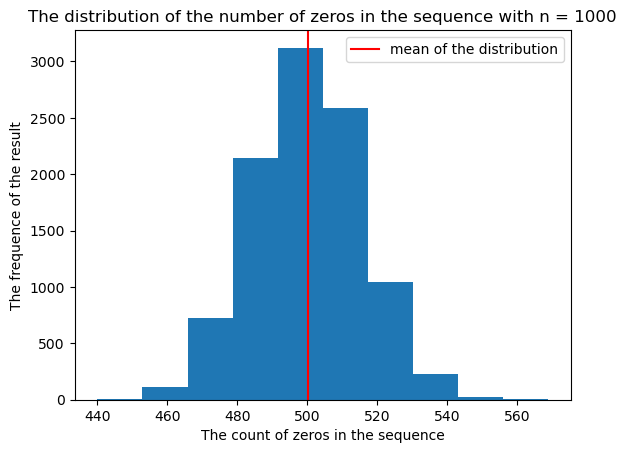

The simulated mean of the distribution is 500.1438
The analytically calculated expected value of zeros is 500.0


In [269]:
import random 
import numpy as np
import matplotlib.pyplot as plt 



trials = 10000
n = 1000


def zero_count(trials,n):
    """
    input 
        trials (int):
            the number of times the simulation is being run 
        n (int):
            the lenght of the sequence in the simulation
            
    output
        mean (float)
            the average value of the number of zeros in the simlulated sequence
    
    """
    zeros = []
    for i in range(trials):
        sequence = []
        for i in range(n):
            bit =  random.randint(0,1)
            sequence.append(bit)
        zeros.append(sequence.count(0))
    mean = np.mean(zeros)
    return mean
    
    


plt.hist(zeros)
plt.title('The distribution of the number of zeros in the sequence with n = 1000')
plt.xlabel('The count of zeros in the sequence')
plt.ylabel('The frequence of the result')
plt.axvline(zero_count(trials,n), color = 'red', label = "mean of the distribution")
plt.legend()
plt.show()

print("The simulated mean of the distribution is {}".format(zero_count(trials,n)))
print("The analytically calculated expected value of zeros is {}".format(n*0.5))

        
        

In [167]:
#Q1.2 simulation for any run lenght 
import numpy as np

n = 225672 

def number_of_runs_simulated(n):
    """
    input 
        n (int):
        the length of the sequence
    output 
        result (float):
        the expected number of switches
    """
    trials = 100
    results = []
    for i in range(trials):
        sequence = []
        switch = 0
        for i in range(n):
            sequence.append(random.randint(0,1))
            if sequence[i-1] != sequence[i]:
                    switch += 1 
        results.append(switch)
    return np.mean(results)
    
    
    

print("Simulation result = {}".format(number_of_runs_simulated(n)))
print("Analytical result = {}".format(0.5*n +0.5))

Simulation result = 112876.51
Analytical result = 112836.5


In [265]:

n = 10000
def sequence_generator(n):
    """
    input 
        n (int):
        the length of the sequence
    output 
        sequence (list):
        the sequence of the random codes 
    """
    sequence = []
    for i in range(n):
        sequence.append(random.randint(0,1))
    return sequence 


def k_calculator(sequence,k):
      """
    input 
        sequence (list):
        the sequence of the random codes 
        k (int):
        the length of the run
    output 
        count (int):
        the number of runs of the length k in the sequence 
        
        
    """
    count = 0
    for i in range(len(sequence)):
        run = sequence[i:i+k]
        #check if the run homogeneous 
        if run.count(1)==k or run.count(0) == k:
            if i != 0 and i <= len(sequence) -1 - k:
                if sequence[i] != sequence[i-1] and sequence[i+k-1] != sequence[i+k]:
                    count+=1 
            elif i == 0: 
                if sequence[i+k-1] != sequence[i+k]:
                    count +=1
    return count 



In [280]:
n = 225672
s = sequence_generator(n)
k = 1
print("Simulated number of runs for k = 1 is {}".format(k_calculator(s,1)))
print("Analytical number of runs for k = 1 is {}".format(2*0.5**k +(n-k-1)*0.5**(k+1)))

k = 2
print("Simulated number of runs for k = 2 is {}".format(k_calculator(s,2)))
print("Analytical number of runs for k = 2 is {}".format(2*0.5**k +(n-k-1)*0.5**(k+1)))

k = 3
print("Simulated number of runs for k = 3 is {}".format(k_calculator(s,3)))
print("Analytical number of runs for k = 3 is {}".format(2*0.5**k +(n-k-1)*0.5**(k+1)))

Simulated number of runs for k = 1 is 56744
Analytical number of runs for k = 1 is 56418.5
Simulated number of runs for k = 2 is 28396
Analytical number of runs for k = 2 is 28209.125
Simulated number of runs for k = 3 is 13864
Analytical number of runs for k = 3 is 14104.5


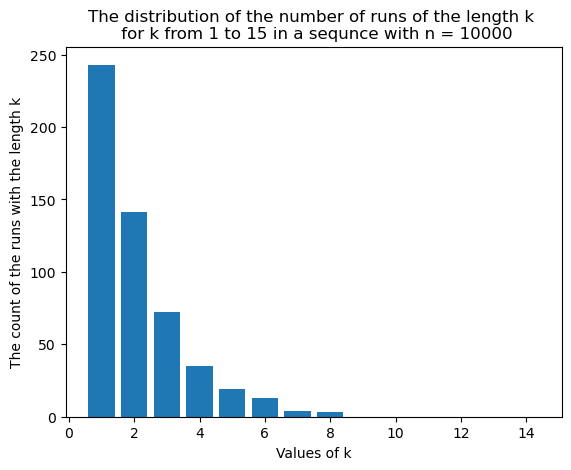

In [274]:
k_count = []
for k in range(1,15):
    k_count.append(k_calculator(sequence_generator(n),k))

x = np.arange(1,15)
    
plt.bar(x,k_count)
plt.title('The distribution of the number of runs of the length k \n for k from 1 to 15 in a sequnce with n = 10000')
plt.xlabel('Values of k')
plt.ylabel('The count of the runs with the length k')
plt.show()

    

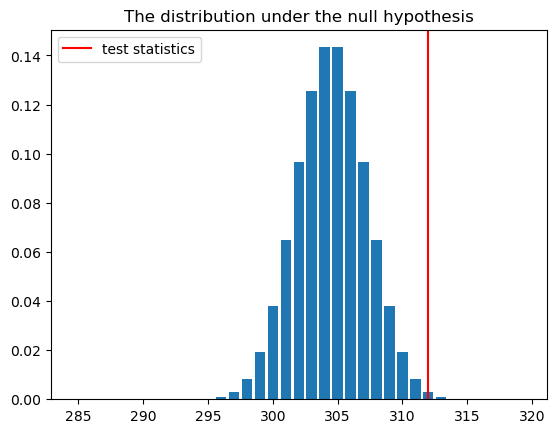

p-value = 0.001


In [124]:
#frequentist model selection
import random 
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt 


#define values for simulated distributino 

n = sts.binom(100000,1/300).rvs()


#define values for null distributino 

null = sts.hypergeom(2*n, n, 297+312)


#plot


plt.figure()
x = np.arange(285,320) # set limits for x axis 
plt.bar(x, null.pmf(x))
plt.axvline(312, color = 'red', label = "test statistics")
plt.title('The distribution under the null hypothesis')
plt.legend()
plt.show()

p_value = 1 - null.cdf(312)

print('p-value = {}'.format(round(p_value,3)))